# Project 1: Medical Insurance
Analysis of US medical insurance data.
- Distribution analysis of non-monetary factors
    - BMI categories
    - Smokers
    - Children
    - Regions
    - Genders
    - Ages
- Distribution analysis of insurance premiums
    - Overall view on premiums
    - Analysis of 20 groups of policy holders (2 genders, 2 smoking status, 5 BMI categories)
    - K-means clustering
    - Analysis of smokers and obesity in each insurance premiums band
    - Analysis of BMI categories in each insurance premiums band
- Insurance premium loading for smokers


<br>

## Import libraries
The following methods from scikit-learn are used
- RANSAC(RANdom SAmple Consensus) regression method
- K-means clustering method

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import RANSACRegressor

<br>

## Import data
Data is imported from a csv file. The sex and charges columns are renamed as gender and insurance_premium respectively.

In [27]:
df = pd.read_csv ('insurance.csv')
df.rename(columns = {'sex':'gender'}, inplace = True)
df.rename(columns = {'charges':'insurance_premium'}, inplace = True)

<br>

## BMI categories
BMI (Body Mass Index) is a decimal value. It is more intuitive to work with BMI categories. With reference to https://en.wikipedia.org/wiki/Body_mass_index, there are 8 BMI categories:
- Underweight (Severe)
- Underweight (Moderate)
- Underweight (Mild)
- Normal
- Overweight (Pre-obese)
- Obese (Class I)
- Obese (Class II)
- Obese (Class III)

In [28]:
def bmi_cat_func(x):
    if x <= 16.0:
        return '1 Underweight (Severe)'
    elif x <= 16.9:
        return '2 Underweight (Moderate)'
    elif x <= 18.4:
        return '3 Underweight (Mild)'
    elif x <= 24.9:
        return '4 Normal'
    elif x <= 29.9:
        return '5 Overweight (Pre-obese)'
    elif x <= 34.9:
        return '6 Obese (Class I)'
    elif x <= 39.9:
        return '7 Obese (Class II)'
    else:
        return '8 Obese (Class III)'
df['bmi']     = df['bmi'].apply(float)    
df['bmi_cat'] = df['bmi'].apply(bmi_cat_func)

<br>

## Distribution analysis of non monetary factors 

Distribution analysis of the following non-monetary factors
- BMI categories
- Smokers
- Children
- Regions
- Genders
- Ages

----------------------------------------------
Number of policy holders in every BMI category
----------------------------------------------
                    bmi_cat  count    percent
0    1 Underweight (Severe)      1   0.074738
1  2 Underweight (Moderate)      2   0.149477
2      3 Underweight (Mild)     17   1.270553
3                  4 Normal    222  16.591928
4  5 Overweight (Pre-obese)    380  28.400598
5         6 Obese (Class I)    397  29.671151
6        7 Obese (Class II)    226  16.890882
7       8 Obese (Class III)     93   6.950673


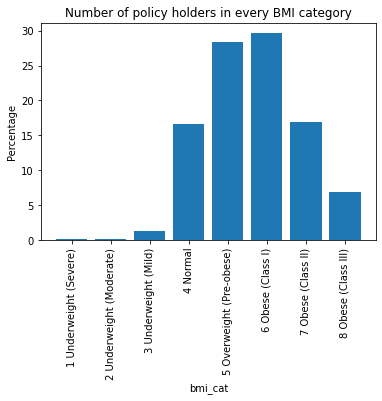




----------------------------------------------
Number of smokers and non smokers
----------------------------------------------
  smoker  count    percent
0     no   1064  79.521674
1    yes    274  20.478326


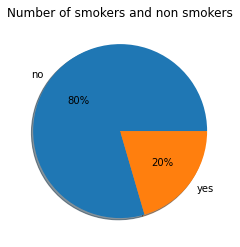




----------------------------------------------
Number children per policy holder
----------------------------------------------
   children  count    percent
0         0    574  42.899851
1         1    324  24.215247
2         2    240  17.937220
3         3    157  11.733931
4         4     25   1.868460
5         5     18   1.345291


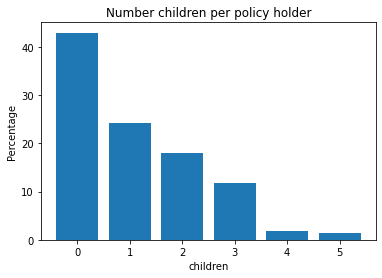




----------------------------------------------
Number of policy holders in every region
----------------------------------------------
      region  count    percent
0  northeast    324  24.215247
1  northwest    325  24.289985
2  southeast    364  27.204783
3  southwest    325  24.289985


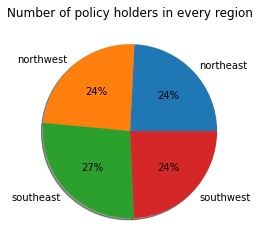




----------------------------------------------
Number of policy holders in every gender
----------------------------------------------
   gender  count    percent
0  female    662  49.476831
1    male    676  50.523169


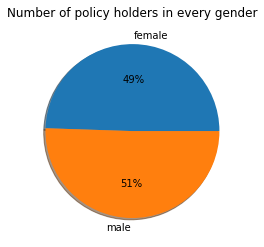




----------------------------------------------
Number of policy holders in every age
----------------------------------------------
    age  count   percent
0    18     69  5.156951
1    19     68  5.082212
2    20     29  2.167414
3    21     28  2.092676
4    22     28  2.092676
5    23     28  2.092676
6    24     28  2.092676
7    25     28  2.092676
8    26     28  2.092676
9    27     28  2.092676
10   28     28  2.092676
11   29     27  2.017937
12   30     27  2.017937
13   31     27  2.017937
14   32     26  1.943199
15   33     26  1.943199
16   34     26  1.943199
17   35     25  1.868460
18   36     25  1.868460
19   37     25  1.868460
20   38     25  1.868460
21   39     25  1.868460
22   40     27  2.017937
23   41     27  2.017937
24   42     27  2.017937
25   43     27  2.017937
26   44     27  2.017937
27   45     29  2.167414
28   46     29  2.167414
29   47     29  2.167414
30   48     29  2.167414
31   49     28  2.092676
32   50     29  2.167414
33   51     29 

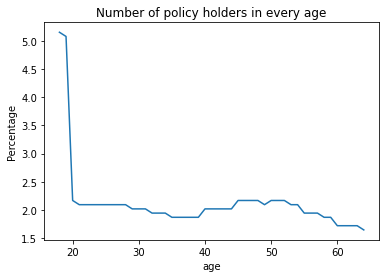

In [29]:
graph_no = 1

def groupby_x (x, T):
    df_groupby = df.groupby([x]).insurance_premium.count().reset_index()
    df_groupby.rename(columns = {'insurance_premium':'count'}, inplace = True)
    df_groupby['percent'] = df_groupby['count'] / df_groupby['count'].sum()*100    
    print('----------------------------------------------')    
    print(T)
    print('----------------------------------------------')  
    print(df_groupby)
    return df_groupby

def plot_line(x, T):
    global graph_no
    df_groupby = groupby_x (x, T)
    plt.plot(df_groupby[x], df_groupby['percent'])
    plt.title(T)
    plt.xlabel(x)
    plt.ylabel("Percentage")
    plt.savefig(str(graph_no).zfill(2) + '_' + T.replace(' ', '_') + '.svg',bbox_inches='tight')
    plt.show()
    print('\n\n')
    graph_no += 1
 
def plot_pie(x, T):
    global graph_no
    df_groupby = groupby_x (x, T)
    plt.pie(df_groupby['percent'], labels = df_groupby[x], shadow = True, autopct = lambda x: '{:.0f}%'.format(x))
    plt.title(T)
    plt.savefig(str(graph_no).zfill(2) + '_' + T.replace(' ', '_') + '.svg',bbox_inches='tight')
    plt.show()
    print('\n\n')
    graph_no += 1  

def plot_bar(x, T):  
    global graph_no
    df_groupby = groupby_x (x, T)
    plt.bar(df_groupby[x], df_groupby['percent'])
    plt.title(T)
    plt.xlabel(x)
    plt.ylabel("Percentage")
    if x == 'bmi_cat':
        plt.xticks(rotation='vertical')
    plt.savefig(str(graph_no).zfill(2) + '_' + T.replace(' ', '_') + '.svg',bbox_inches='tight')
    plt.show()
    print('\n\n')
    graph_no += 1
    
plot_bar ('bmi_cat' , 'Number of policy holders in every BMI category')
plot_pie ('smoker'  , 'Number of smokers and non smokers')    
plot_bar ('children', 'Number children per policy holder')    
plot_pie ('region'  , 'Number of policy holders in every region')
plot_pie ('gender'  , 'Number of policy holders in every gender')
plot_line('age'     , 'Number of policy holders in every age')

Distribution of policy holders:
- 16% have normal BMI. 
- 53.51%^ are obese. 
- 80% are non-smokers.
- Most common BMI category is Obese (Class I).
- Most policy holders have either no child or one child.
- There are roughly equal numbers of policy holders in every region.
- There are roughly equal numbers of male and female policy holders.
- The 18 and 19 years old policy holders are more than double of other ages.

^ 29.67% + 16.89% + 6.95% = 53.51%

<br>

## Distribution analysis of insurance premiums

Distribution analysis of insurance premiums
- Overall view on premiums
- Analysis of 20 groups of policy holders (2 genders, 2 smoking status, 5 BMI categories)
- K-means clustering
- Analysis of smokers and obesity in each insurance premiums band
- Analysis of BMI categories in each insurance premiums band

### Procedures

In [30]:
bmi_cat_color    = {'4': 'b', '5': 'c', '6': 'm', '7': 'r', '8': 'k'}
smoking          = {'yes': 'smokers', 'no': 'non-smokers'}
RANSAC_slope     = {}
RANSAC_intercept = {}

def plot_scatter (df_filtered, plot_color, plot_label, plot_all, RANSAC_label, plot_title = ''):    
    global RANSAC_slope
    global RANSAC_intercept
    if len(df_filtered) > 4:
        if plot_title != '':
            plt.title(plot_title)
            plt.xlabel('age')
            plt.ylabel("insurance premiums")    
        RANSAC = RANSACRegressor().fit(df_filtered[['age']], df_filtered['insurance_premium'])
        RANSAC_slope [RANSAC_label] = RANSAC.estimator_.coef_[0]
        RANSAC_intercept [RANSAC_label] = RANSAC.estimator_.intercept_
        if plot_all == 'yes':
            plt.scatter(df['age'], df['insurance_premium'], marker = '.', color = '#00FF00', label='Others')
            plt.ylim((0,70000))
        if plot_label == '':
            plt.scatter(df_filtered['age'], df_filtered['insurance_premium'], marker = '.', color = plot_color)
        else:
            plt.scatter(df_filtered['age'], df_filtered['insurance_premium'], marker = '.', color = plot_color, 
                        label=plot_label)
            plt.legend(loc="upper left")  
        plt.plot (df_filtered['age'], RANSAC.predict(df_filtered[['age']]), color = plot_color)
#       print(plot_label, ' slope = ', RANSAC.estimator_.coef_[0], ', intercept = ', RANSAC.estimator_.intercept_)

<br>

### Overall view on premiums

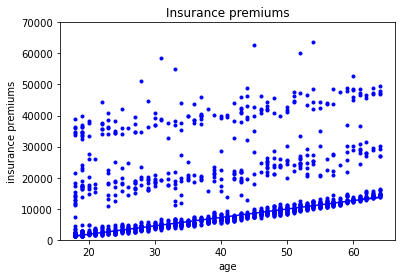

In [31]:
plot_scatter (df, 'b', '', 'no', 'all', 'Insurance premiums')
plt.ylim((0,70000))
plt.savefig(str(graph_no).zfill(2) + '_' + 'Insurance_premium.svg',bbox_inches='tight')
plt.show()
graph_no += 1

From the overall view of insurance premiums, 
- Insurance premiums increase with age
- Insurance premiums can be divided into 3 distinct bands. 

Let call the three bands top band (highest premiums), middle band and bottom band (lowest premiums).

For the trend lines, RANSAC regression method rather than least squared method is used. This is because RANSAC regression method is less susceptible to outliers.

<br>

### Analysis of 20 groups of policy holders (2 genders, 2 smoking status, 5 BMI categories)

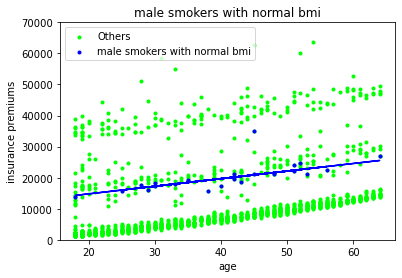

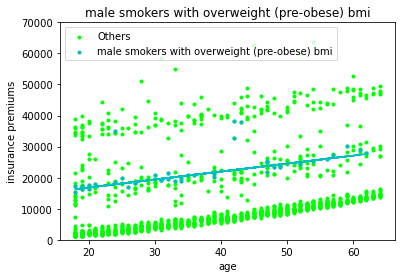

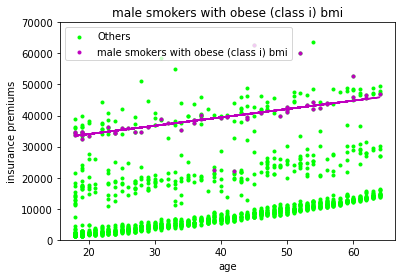

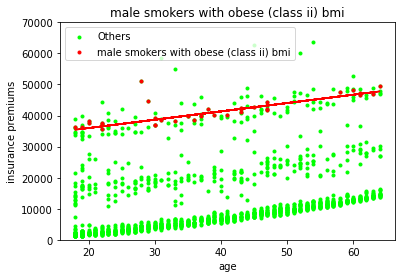

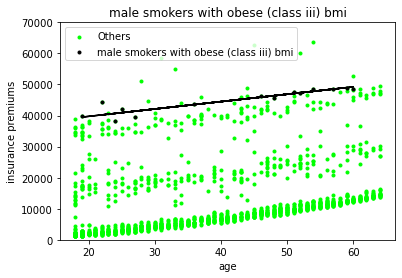

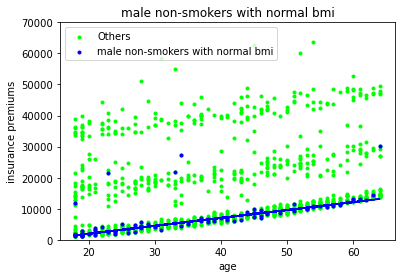

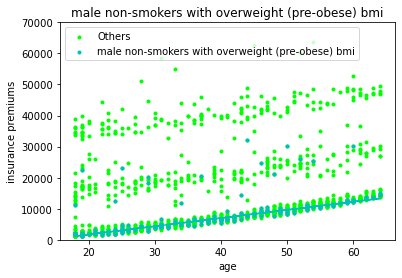

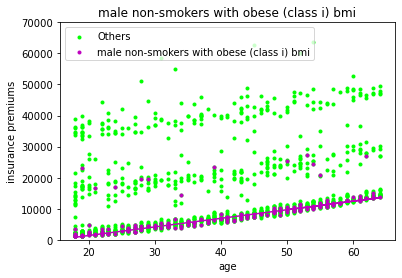

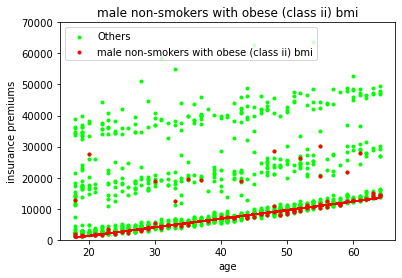

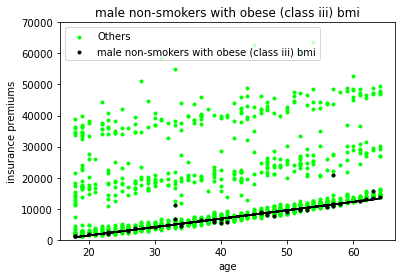

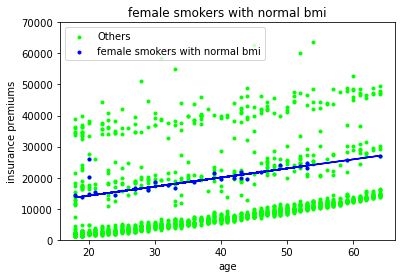

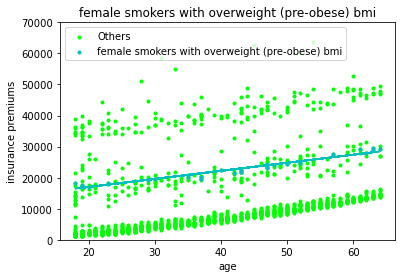

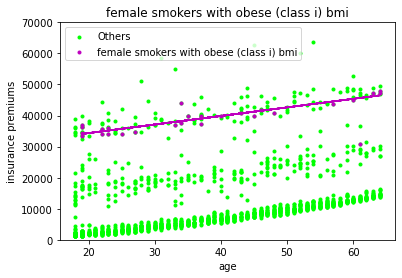

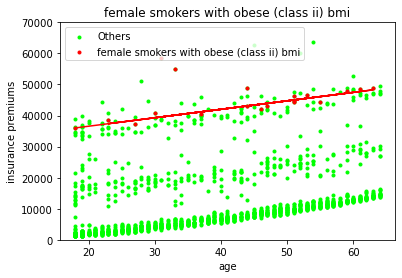

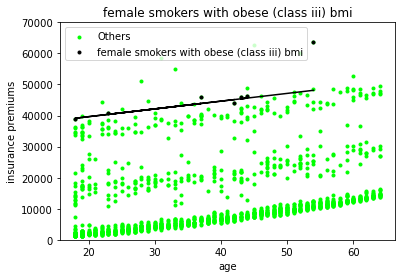

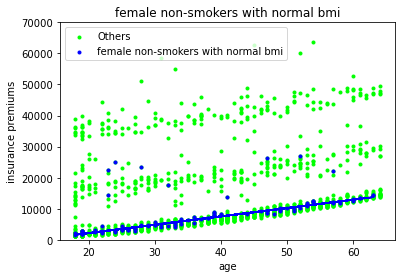

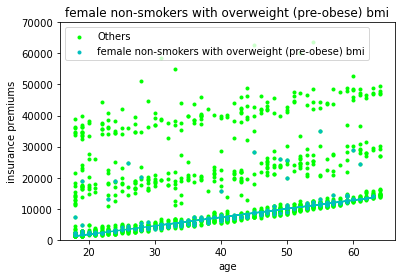

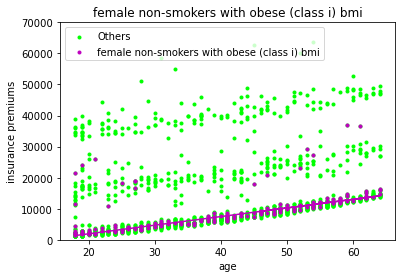

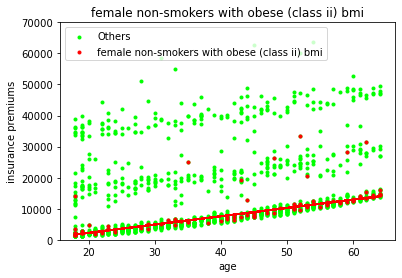

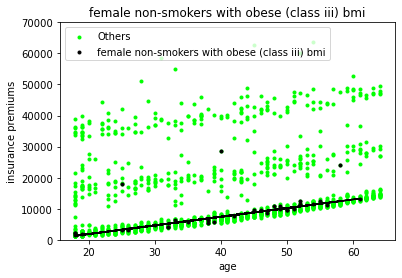




Trend lines (RANSAC coefficients) for all 20 groups of policy holders

Gender 	 Smoking 	 BMI categories 		slope 			 intercept
male 	 yes 		 4 Normal                	244.50659003787152 	 9892.354089034383
male 	 yes 		 5 Overweight (Pre-obese)	256.7746614488314 	 11695.861746228114
male 	 yes 		 6 Obese (Class I)       	269.1499159112379 	 28642.6912646915
male 	 yes 		 7 Obese (Class II)      	268.43486059906854 	 30602.86217832652
male 	 yes 		 8 Obese (Class III)     	237.5658635308697 	 34982.8585603763
male 	 no 		 4 Normal                	254.50547867900434 	 -3141.5174601991184
male 	 no 		 5 Overweight (Pre-obese)	263.48629719437974 	 -3551.3850921424037
male 	 no 		 6 Obese (Class I)       	276.6142541034627 	 -4157.064961247708
male 	 no 		 7 Obese (Class II)      	277.2735700938323 	 -4299.680529253922
male 	 no 		 8 Obese (Class III)     	270.40131608183265 	 -4016.2677587703056
female 	 yes 		 4 Normal                	292.2493262020217 	 8358.934400707823
female 	 yes 	

In [32]:
for i_gender in ["male", "female"]:
  for i_smoker in ["yes", "no"]:
    for i_bmi_cat in ['4 Normal', '5 Overweight (Pre-obese)', '6 Obese (Class I)', '7 Obese (Class II)', 
                      '8 Obese (Class III)']:
        df_filtered = df[(df['gender'] == i_gender) & (df['smoker'] == i_smoker) & (df['bmi_cat'] == i_bmi_cat)]
        
        plot_label_title = i_gender + ' ' + smoking[i_smoker] + ' with ' + i_bmi_cat[2:].lower() + ' bmi'
        plot_scatter (df_filtered, bmi_cat_color[i_bmi_cat[0]], plot_label_title, 'yes', 
                      i_gender[0] + i_smoker[0] + i_bmi_cat[0], plot_label_title)
        plt.savefig(str(graph_no).zfill(2) + '_' + plot_label_title.lower().replace(' ', '_') + '.svg',bbox_inches='tight')
        plt.show()
        graph_no += 1 
        print('\n\n')

# Print all RANSAC coefficients
print('Trend lines (RANSAC coefficients) for all 20 groups of policy holders\n')
print('Gender \t Smoking \t BMI categories \t\tslope \t\t\t intercept')
for i_gender in ["male", "female"]:
  for i_smoker in ["yes", "no"]:
    for i_bmi_cat in ['4 Normal', '5 Overweight (Pre-obese)', '6 Obese (Class I)', '7 Obese (Class II)', 
                      '8 Obese (Class III)']:
      print(i_gender, '\t', i_smoker, '\t\t' , i_bmi_cat.ljust(24,' '), end='\t')
      print(RANSAC_slope[i_gender[0] + i_smoker[0] + i_bmi_cat [0]], '\t', 
            RANSAC_intercept[i_gender[0] + i_smoker[0] + i_bmi_cat [0]])
      

From the above scatter plots, within each group, most of the policy holders stay within one premium band. There are some outliers in other bands.

<br>

### K-means clustering
K-means clustering method is used to divide all insurance premiums into 3 bands.

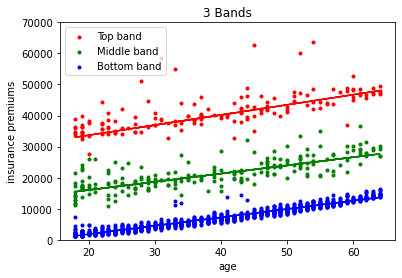

In [33]:
# mn4 for male non smoker with '4 Normal' BMI
df['Adjusted insurance_premium'] = df['insurance_premium'] - RANSAC_slope['mn4']*df['age'] - RANSAC_intercept['mn4']

data   = list(zip(df['age'], df['Adjusted insurance_premium']))
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

min0 = df[kmeans.labels_ == 0].insurance_premium.min()
min1 = df[kmeans.labels_ == 1].insurance_premium.min()
min2 = df[kmeans.labels_ == 2].insurance_premium.min()

# Find which is the bottom, middle and top band respectively
if (min0 == min(min0, min1, min2)):
    L0 = 0
    if (min1 < min2):
        L1 = 1
        L2 = 2
    else:
        L1 = 2
        L2 = 1 
elif (min1 == min(min0, min1, min2)):
    L0 = 1    
    if (min0 < min2):
        L1 = 0
        L2 = 2
    else:
        L1 = 2
        L2 = 0    
else:
    L0 = 2
    if (min0 < min1):
        L1 = 0
        L2 = 1
    else:
        L1 = 1
        L2 = 0        

df_filtered = df[kmeans.labels_ == L2]
plot_scatter (df_filtered, 'r', 'Top band', 'no', 'top', '3 Bands')
df_filtered = df[kmeans.labels_ == L1]
plot_scatter (df_filtered, 'g', 'Middle band', 'no', 'middle')
df_filtered = df[kmeans.labels_ == L0]
plot_scatter (df_filtered, 'b', 'Bottom band', 'no', 'bottom')
plt.ylim((0,70000))
plt.savefig(str(graph_no).zfill(2) + '_' + 'Three_Bands.svg',bbox_inches='tight')
plt.show()
graph_no += 1

<br>

### Analysis of smokers and obesity in each insurance premiums band

In [34]:
def compare_smokers(i_gender):
    n00 = len(df[(kmeans.labels_ == L0) & (df['smoker'] == 'no')  & (df['gender'] == i_gender)])
    n01 = len(df[(kmeans.labels_ == L1) & (df['smoker'] == 'no')  & (df['gender'] == i_gender)])
    n02 = len(df[(kmeans.labels_ == L2) & (df['smoker'] == 'no')  & (df['gender'] == i_gender)])
    n10 = len(df[(kmeans.labels_ == L0) & (df['smoker'] == 'yes') & (df['gender'] == i_gender)])
    n11 = len(df[(kmeans.labels_ == L1) & (df['smoker'] == 'yes') & (df['gender'] == i_gender)])
    n12 = len(df[(kmeans.labels_ == L2) & (df['smoker'] == 'yes') & (df['gender'] == i_gender)])
    nT  = 1.0*(n00 + n01 + n02 + n10 + n11 + n12)
    print(i_gender)
    print('Number    \tBottom Band\tMiddle Band\tTop Band\tTotal')
    print('Non Smoker', '\t', n00      , '\t\t', n01      , '\t\t', n02      , '\t\t', n00 + n01 + n02)
    print('Smoker    ', '\t', n10      , '\t\t', n11      , '\t\t', n12      , '\t\t', n10 + n11 + n12)
    print('Total     ', '\t', n00 + n10, '\t\t', n01 + n11, '\t\t', n02 + n12, '\t\t', n00 + n01 + n02 + n10 + n11 + n12)
    print('\n')
    print(i_gender)
    print('Percent   \tBottom Band\tMiddle Band\tTop Band\tTotal')
    print('Non Smoker', '\t', "{:.1%}".format(n00/nT)        , '\t\t', "{:.1%}".format(n01/nT)        , 
          '\t\t', "{:.1%}".format(n02/nT)        , '\t\t', "{:.1%}".format((n00 + n01 + n02)/nT))
    print('Smoker    ', '\t', "{:.1%}".format(n10/nT)        , '\t\t', "{:.1%}".format(n11/nT)        , 
          '\t\t',   "{:.1%}".format(n12/nT)      , '\t\t', "{:.1%}".format((n10 + n11 + n12)/nT))
    print('Total     ', '\t', "{:.0%}".format((n00 + n10)/nT), '\t\t', "{:.1%}".format((n01 + n11)/nT), 
          '\t\t', "{:.1%}".format((n02 + n12)/nT), '\t\t', "{:.1%}".format((n00 + n01 + n02 + n10 + n11 + n12)/nT))
    print('\n')
    n00 = len(df[(kmeans.labels_ == L1) & (df['smoker'] == 'yes') & (df['bmi'] <= 29.9) & (df['gender'] == i_gender)])
    n01 = len(df[(kmeans.labels_ == L2) & (df['smoker'] == 'yes') & (df['bmi'] <= 29.9) & (df['gender'] == i_gender)])
    n10 = len(df[(kmeans.labels_ == L1) & (df['smoker'] == 'yes') & (df['bmi']  > 29.9) & (df['gender'] == i_gender)])
    n11 = len(df[(kmeans.labels_ == L2) & (df['smoker'] == 'yes') & (df['bmi']  > 29.9) & (df['gender'] == i_gender)])
    nT  = 1.0*(n00 + n01 + n10 + n11)
    print(i_gender + ' smokers')
    print('Number    \tMiddle Band\tTop Band\tTotal')
    print('Non Obese', '\t', n00      , '\t\t', n01      , '\t\t', n00 + n01)
    print('Obese    ', '\t', n10      , '\t\t', n11      , '\t\t', n10 + n11)
    print('Total    ', '\t', n00 + n10, '\t\t', n01 + n11, '\t\t', n00 + n01 + n10 + n11)
    print('\n')
    print(i_gender + ' smokers')
    print('Percent   \tMiddle Band\tTop Band\tTotal')
    print('Non Obese', '\t', "{:.1%}".format(n00/nT)        , '\t\t', "{:.1%}".format(n01/nT)        , '\t\t', 
          "{:.1%}".format((n00 + n01)/nT))
    print('Obese    ', '\t', "{:.1%}".format(n10/nT)        , '\t\t', "{:.1%}".format(n11/nT)        , '\t\t', 
          "{:.1%}".format((n10 + n11)/nT))
    print('Total    ', '\t', "{:.1%}".format((n00 + n10)/nT), '\t\t', "{:.1%}".format((n01 + n11)/nT), '\t\t', 
          "{:.1%}".format((n00 + n01 + n10 + n11)/nT))   
    print('\n\n')
compare_smokers('male')
compare_smokers('female')

male
Number    	Bottom Band	Middle Band	Top Band	Total
Non Smoker 	 473 		 43 		 1 		 517
Smoker     	 0 		 62 		 97 		 159
Total      	 473 		 105 		 98 		 676


male
Percent   	Bottom Band	Middle Band	Top Band	Total
Non Smoker 	 70.0% 		 6.4% 		 0.1% 		 76.5%
Smoker     	 0.0% 		 9.2% 		 14.3% 		 23.5%
Total      	 70% 		 15.5% 		 14.5% 		 100.0%


male smokers
Number    	Middle Band	Top Band	Total
Non Obese 	 60 		 5 		 65
Obese     	 2 		 92 		 94
Total     	 62 		 97 		 159


male smokers
Percent   	Middle Band	Top Band	Total
Non Obese 	 37.7% 		 3.1% 		 40.9%
Obese     	 1.3% 		 57.9% 		 59.1%
Total     	 39.0% 		 61.0% 		 100.0%



female
Number    	Bottom Band	Middle Band	Top Band	Total
Non Smoker 	 499 		 47 		 1 		 547
Smoker     	 0 		 62 		 53 		 115
Total      	 499 		 109 		 54 		 662


female
Percent   	Bottom Band	Middle Band	Top Band	Total
Non Smoker 	 75.4% 		 7.1% 		 0.2% 		 82.6%
Smoker     	 0.0% 		 9.4% 		 8.0% 		 17.4%
Total      	 75% 		 16.5% 		 8.2% 		 100.0%


#### Smoking
For both male and female policy holders, there is no smokers in bottom band. There is almost no non-smokers in top band. Hence,
- Top band &nbsp; &nbsp; &nbsp;: Mostly smokers 
- Middle band : Mostly smokers
- Bottom band : Non-smokers

#### Obesity
For smokers, most of the obese policy holders are in top band and most of the non-obese policy holders are in middle band. Hence,
- Middle band : Mostly non-obese smokers
- Bottom band : Mostly obese smokers

#### Summary
- Top band &nbsp; &nbsp; &nbsp;: Mostly obese smokers
- Middle band : Mostly non-obese smokers
- Bottom band : Non-smokers

<br>

### BMI categories in each insurance premiums band

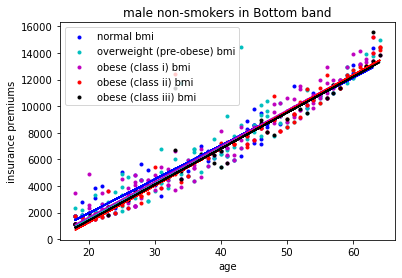

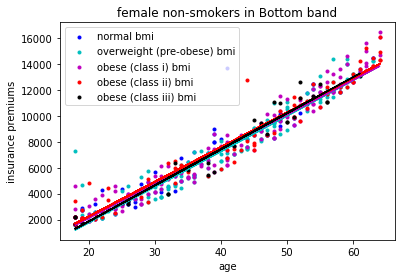

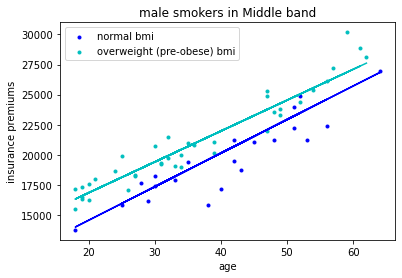

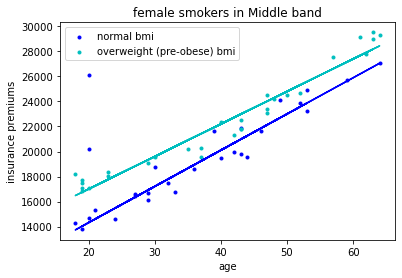

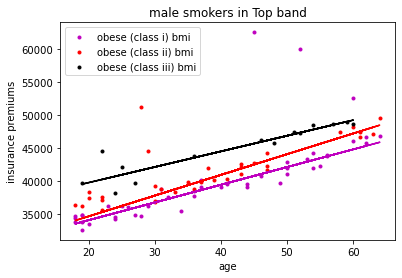

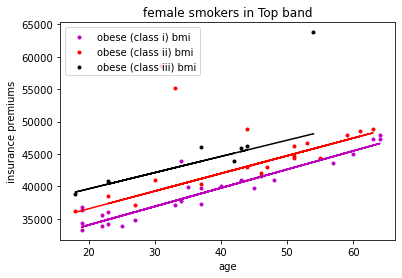

In [35]:
def compare_bmi_cat(band, i_gender):  
    global graph_no
    if band == 'Bottom':
        i_L = L0
        i_smoker = 'no'
    elif band == 'Middle':
        i_L = L1
        i_smoker = 'yes'
    else:
        i_L = L2
        i_smoker = 'yes'
    
    for i_bmi_cat in ['4 Normal', '5 Overweight (Pre-obese)', '6 Obese (Class I)', '7 Obese (Class II)', 
                      '8 Obese (Class III)']:
        df_filtered = df[(kmeans.labels_ == i_L) & (df['bmi_cat'] == i_bmi_cat) & 
                         (df['smoker'] == i_smoker) & (df['gender'] == i_gender)]
      
        plot_title = i_gender + ' ' + smoking[i_smoker] + ' in ' + band + " band"
        plot_label = i_bmi_cat[2:].lower() + ' bmi'
        plot_scatter (df_filtered, bmi_cat_color[i_bmi_cat[0]], plot_label, 'no', 
                      band.lower() + '_' + i_gender[0] + i_smoker[0] + i_bmi_cat[0], plot_title)        
    plt.savefig(str(graph_no).zfill(2) + '_' + plot_title.lower().replace(' ', '_') + '.svg',bbox_inches='tight')
    plt.show()
    graph_no += 1

compare_bmi_cat ('Bottom', 'male')
compare_bmi_cat ('Bottom', 'female')
compare_bmi_cat ('Middle', 'male')
compare_bmi_cat ('Middle', 'female')
compare_bmi_cat ('Top'   , 'male')
compare_bmi_cat ('Top'   , 'female')

For non-smokers, the premium trend lines are very close together. Hence, for non-smokers in the bottom band, BMI category is not a major factor affecting insurance premiums.

Hence, the insurance premiums are in the following order
- Non-smokers &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Lowest insurance premium
- Smokers with normal BMI
- Smokers with overweight (pre-obese) BMI
- Smokers with obese (class i) BMI
- Smokers with obese (class ii) BMI
- Smokers with obese (class iii) BMI &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Highest insurance premium

<br>

### Insurance premium loading for smokers

Note: Insurance premium loading means additional insurance premium.

Male 			 Yearly 		 Yearly 		 Age 18 to 64 		 Age 18 to 64
BMI 			 Min loading 		 Max loading 		 Total loading 		 (Smoker $$$)/(Non smoker $$$)
Normal               	 12,394 		 12,854 		 593,324 		 2.73
Overweight (Pre-obese) 	 14,878 		 14,983 		 701,730 		 3.05
Obese (Class I)      	 32,048 		 32,721 		 1,522,078 		 5.44
Obese (Class II)     	 33,995 		 34,636 		 1,612,828 		 5.71
Obese (Class III)    	 37,040 		 37,819 		 1,759,203 		 6.13


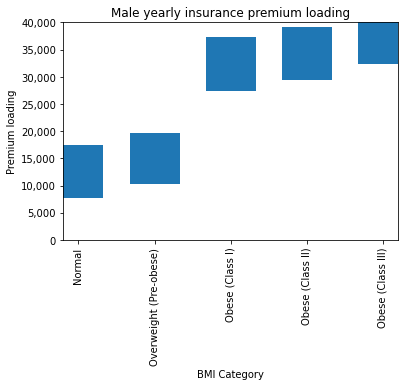

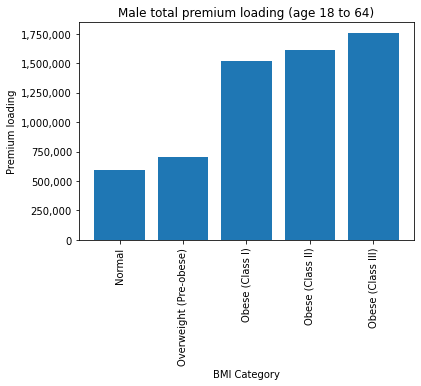

Female 			 Yearly 		 Yearly 		 Age 18 to 64 		 Age 18 to 64
BMI 			 Min loading 		 Max loading 		 Total loading 		 (Smoker $$$)/(Non smoker $$$)
Normal               	 12,004 		 13,079 		 589,442 		 2.61
Overweight (Pre-obese) 	 14,450 		 14,865 		 688,896 		 2.88
Obese (Class I)      	 32,187 		 32,503 		 1,520,204 		 5.15
Obese (Class II)     	 34,400 		 34,561 		 1,620,593 		 5.42
Obese (Class III)    	 36,639 		 37,521 		 1,742,743 		 5.75


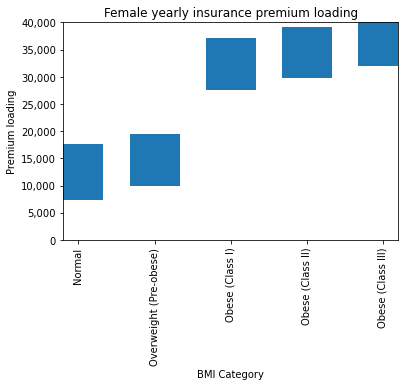

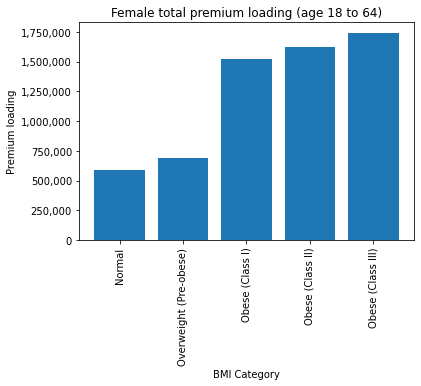

In [37]:
gender_label = {'m':'Male', 'f':'Female'}
X_label = {'4':'Normal', '5':'Overweight (Pre-obese)', '6':'Obese (Class I)', '7':'Obese (Class II)', 
           '8':'Obese (Class III)'}
age_range = np.arange(18, 65, dtype=int)

print('Note: Insurance premium loading means additional insurance premium.\n')
for i_gender in ['m', 'f']:
    print(gender_label[i_gender], '\t\t\t Yearly \t\t Yearly \t\t Age 18 to 64 \t\t Age 18 to 64')
    print('BMI \t\t\t Min loading \t\t Max loading \t\t Total loading \t\t (Smoker $$$)/(Non smoker $$$)')
    min_smokers_loading       = {'4':0  , '5':0  , '6':0  , '7':0  , '8':0}
    max_smokers_loading       = {'4':0  , '5':0  , '6':0  , '7':0  , '8':0}
    total_smokers_loading     = {'4':0  , '5':0  , '6':0  , '7':0  , '8':0}
    ratio_smokers_premium     = {'4':0.0, '5':0.0, '6':0.0, '7':0.0, '8':0.0}
    non_smokers_premium       = RANSAC_slope[i_gender + 'n4']*age_range + RANSAC_intercept[i_gender + 'n4']
    sum_non_smokers_premium   = 1.0*sum(non_smokers_premium)
    for i_bmi_cat in ['4', '5', '6' ,'7', '8']:          
        smokers_loading = RANSAC_slope[i_gender + 'y' + i_bmi_cat]*age_range + RANSAC_intercept[i_gender + 'y' 
                            + i_bmi_cat] - non_smokers_premium       
        min_smokers_loading[i_bmi_cat]   = min(smokers_loading)
        max_smokers_loading[i_bmi_cat]   = max(smokers_loading)
        total_smokers_loading[i_bmi_cat] = sum(smokers_loading)
        ratio_smokers_premium[i_bmi_cat] = total_smokers_loading[i_bmi_cat]/sum_non_smokers_premium + 1
        print(X_label[i_bmi_cat].ljust(20, ' '), '\t', 
              f"{min_smokers_loading  [i_bmi_cat]:,.0f}",'\t\t',
              f"{max_smokers_loading  [i_bmi_cat]:,.0f}",'\t\t',             
              f"{total_smokers_loading[i_bmi_cat]:,.0f}",'\t\t',
              f"{ratio_smokers_premium[i_bmi_cat]:,.2f}")  
    plot_title = gender_label[i_gender] + ' yearly insurance premium loading'
    plt.title(plot_title)
    plt.xlabel('BMI Category')
    plt.xticks(rotation='vertical')
    plt.ylabel("Premium loading")
    plt.ylim((0,40000))
    for i_bmi_cat in ['4', '5', '6' ,'7', '8']:
        plt.axvline(x=X_label[i_bmi_cat], ymin=min_smokers_loading[i_bmi_cat]/40000.0, 
                    ymax=max_smokers_loading[i_bmi_cat]/40000.0, lw=50)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.savefig(str(graph_no).zfill(2) + '_' + plot_title.lower().replace(' ', '_') + '.svg', bbox_inches='tight')    
    plt.show()
    graph_no += 1
    
    plt.title(plot_title)    
    plt.title(gender_label[i_gender] + ' total premium loading (age 18 to 64)')
    plt.xlabel('BMI Category')
    plt.xticks(rotation='vertical')
    plt.ylabel("Premium loading")
    plt.bar(['Normal', 'Overweight (Pre-obese)', 'Obese (Class I)', 'Obese (Class II)', 'Obese (Class III)'], 
              total_smokers_loading.values()) 
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.savefig(str(graph_no).zfill(2) + '_' + plot_title.lower().replace(' ', '_') + '.svg', bbox_inches='tight')      
    plt.show() 
    graph_no += 1

Insurance premium loading means additional insurance premium. 

| Additional premium for smokers                | Not obese                     | Obese                       |
|:----------------------------------------------|:-----------------------------:|:---------------------------:|
| Yearly additional insurance premium           | 12K to 15k                    | 32K to 38K                  |
| Total additional premium from age 18 to 64    | 600k to 700k                  | 1.5M to 1.7M                |
| Total premium paid from age 18 to 64          | 2.6 to 3 times of non smokers | 5 to 6 times of non-smokers |


### Conclusion: Want low insurance premium ? 
### Do not smoke and stay health.

<br><br>

## Fulfilment of course requirement
Data Scientist: Analytics Specialist course at http://www.codecademy.com.